In [1]:
import os
import sys
import gensim

import pandas as pd
import numpy as np
from data_processing.data_loader import DataLoader
from data_processing.split_cell import split_cell
from data_processing.preprocess import Preprocess_gene
from data_processing.data import TwitterDataset

%config InlineBackend.figure_format = 'svg'

In [ ]:
#Input the gene expression matrix, with gene names as row names and cell names as column names.
matrix_1 = pd.read_csv("./example/heart_count_dat.txt",sep="\t",index_col=0)
matrix_1

,HE5W_1_LA.1,HE5W_1_LA.2,HE5W_1_LA.3,HE5W_1_LA.4,HE5W_1_LA.5,HE5W_1_LA.6,HE5W_1_LA.7,HE5W_1_LA.8,HE5W_1_LA.9,HE5W_1_LA.10,...,HE23W_2_RV.15,HE23W_2_RV.16,HE23W_2_RV.17,HE23W_2_RV.18,HE23W_2_RV.19,HE23W_2_RV.20,HE23W_2_RV.21,HE23W_2_RV.22,HE23W_2_RV.23,HE23W_2_RV.24
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
A2M,0,0,0,0,0,1,1,0,0,0,...,2,3,0,60,0,0,0,50,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYG11B,0,0,0,0,0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
ZYX,0,0,0,20,2,16,0,12,0,0,...,50,2,0,1,3,0,0,34,0,78


In [3]:
fil_type1=pd.read_csv('./example/heart_type.txt',sep="\t")
fil_type1

,cell,time,cell.1,type
0,HE5W_1_LA.1,5.0,HE5W,CMs
1,HE5W_1_LA.3,5.0,HE5W,CMs
2,HE5W_1_LA.4,5.0,HE5W,CMs
3,HE5W_1_LA.7,5.0,HE5W,CMs
4,HE5W_1_LA.9,5.0,HE5W,CMs
...,...,...,...,...
3449,HE23W_2_RV.4,23.0,HE23W,Macrophage
3450,HE23W_2_RV.7,23.0,HE23W,Macrophage
3451,HE23W_2_RV.9,23.0,HE23W,Macrophage
3452,HE23W_2_RV.10,23.0,HE23W,Macrophage


In [6]:
train_data1, test_data1, train_expression_matrix1, test_expression_matrix1 = split_cell(fil_type1, matrix_1, 
                                                                                    group_column='type', cell_name_column='cell',
                                                                                    random_state=9)

In [ ]:
#Process the metadata and the corresponding data.
loader1 = DataLoader(expression_matrix_1=test_expression_matrix1, cell_labels_1=test_data1, top_genes=1000, mode="target",cell_name_column='cell')

ref_dat, ref_label, ref_cell_labels = loader1.process_data()

print("Updated ref_cell_labels:")
print(ref_cell_labels)

更新后的 ref_cell_labels:
              cell  time cell.1         type cell_id    mode
0    HE24W_1_RA.60  24.0  HE24W          CMs     1_1  target
1    HE22W_1_RA.78  22.0  HE22W          CMs     1_2  target
2    HE10W_1_LA.25  10.0  HE10W          CMs     1_3  target
3     HE17W_2_LA.3  17.0  HE17W          CMs     1_4  target
4    HE24W_1_RV.73  24.0  HE24W          CMs     1_5  target
..             ...   ...    ...          ...     ...     ...
688  HE23W_2_BV.20  23.0  HE23W  Valvar cell   1_689  target
689   HE22W_1_BV.5  22.0  HE22W  Valvar cell   1_690  target
690  HE22W_1_PV.38  22.0  HE22W  Valvar cell   1_691  target
691   HE25W_1_AV.5  25.0  HE25W  Valvar cell   1_692  target
692   HE25W_1_EP.7  25.0  HE25W  Valvar cell   1_693  target

[693 rows x 6 columns]


In [ ]:
#Encode genes using the trained w2v model. The default path uses the trained model.
#If you have your own trained w2v vectors, you can add them manually—make sure the version number matches.
preprocess = Preprocess_gene(ref_dat, sen_len=1000)
embedding = preprocess.make_embedding()
gene_name = preprocess.sentence_word2idx()
gene_label = preprocess.labels_to_tensor(ref_label)

Get embedding ...
loading word to vec model ...
get words #84312
total words: 84315


In [ ]:
#Switch the mode to "single" for the application process.
ref_dataset = TwitterDataset(x=gene_name, z=gene_label, mode="single")

In [10]:
from get_result.Get_emb import AlignCell_Emb
from AlignCell import TransformerEncoder, PositionalEncoding, EncoderLayer, FeedForward

emb_dat=AlignCell_Emb("./test_heart/FineTurn_no_mtDNA.model")
ref_label, ref_embed, attention_value=emb_dat.get_embeddings(ref_dataset,output_attentions=True)
attention_value = attention_value.squeeze()
first_layer_attention = attention_value[:, 0, :, :]
slc_attention = first_layer_attention[:, 0, 1:]

Processing Dataset: 100%|██████████| 693/693 [00:36<00:00, 18.79it/s]


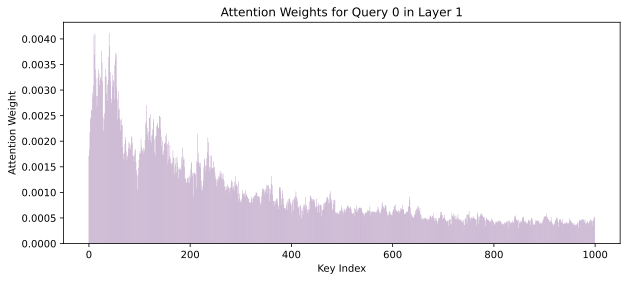

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Switch the mode to "single" for the application process.
query_index = 0
layer_index = 0

att_weights = slc_attention[layer_index]
plt.figure(figsize=(10, 4))
plt.bar(range(len(att_weights)), att_weights, color='#b395bd')
plt.xlabel('Key Index')
plt.ylabel('Attention Weight')
plt.title(f'Attention Weights for Query {query_index} in Layer {layer_index + 1}')
# plt.savefig('heart_attention_relationship_bar.pdf', format='pdf')
plt.show()

In [12]:
from get_result.Get_Genes import extract_high_attention_genes

In [ ]:
#Output the attention weights along with the gene information.
attention_dat = extract_high_attention_genes(
        slc_attention=slc_attention,
        gene_name=gene_name,
        preprocess=preprocess,
        ref_cell_labels=ref_cell_labels,
        threshold=0.002,
        cell_index_column='cell',
        cell_type_column='type'
)
attention_dat

,celltype,gene_symbol,count,mean_attention
0,CMs,<UNK>,1214,0.002767
1,CMs,FTH1,284,0.003192
2,CMs,TNNC1,277,0.002934
3,CMs,TNNT2,274,0.002941
4,CMs,EEF1A1,269,0.003062
...,...,...,...,...
7677,Valvar cell,DDAH2,1,0.002438
7678,Valvar cell,AK1,1,0.002331
7679,Valvar cell,GPAA1,1,0.002274
7680,Valvar cell,NFIA,1,0.002218
